# MOVIE Popularity Prediction
Movies' data is stored on several popular websites, but when it comes to critic reviews there is no better place than Rotten Tomatoes. Rotten Tomatoes and the Tomatometer score are the world’s most trusted recommendation resources for quality entertainment. As the leading online aggregator of movie and TV show reviews from critics, we provide fans with a comprehensive guide to what’s Fresh – and what’s Rotten – in theaters and at home. After exploring and cleaning our data a little, we're going to answer questions like:
- What is the Most Frequently Production Company? Director ? Actors? Or even Author?
- Does criticism really affect Popularity?
- How much audience amount each Year?
- Does `tomatometer_status` really affect Popularity? 
- Do movie stars influence the movies?
- etc

<p><img src="https://pentagram-production.imgix.net/b33a5493-679c-421a-9970-2dfea45a6162/emo_rottentomatoes_01.jpg?crop=edges&fit=crop&h=630&rect=120%2C0%2C2700%2C1688&w=1200">
<p><em>Rotten Tomatoes Logo. </em></p>

<p>The dataset we'll use was from <a href="https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv">Kaggle</a>. It made of CSV file contain for all 17712 movies. Let's take a look, using <code>display()</code> instead of <code>print()</code> since its output is much prettier in Jupyter Notebooks.
    


### Problem Statement :
Most of people know how to figuring out a popularity of a film based on the actors and director, however there are many more features that's weight in before figuring out the popularity of a film.

### Goals :
In this notebook we will do an Exploratory data analysis to figure out what are the factors that's affecting films popularity, after that we will create a machine learning model that will help you predict a film popularity based on the features.

In [1]:
# Import pandas
import pandas as pd
import numpy as np

# Load the CSV data into DataFrames with no restricted columns
df = pd.read_csv('rotten_tomatoes_movies.csv')
pd.set_option('display.max_columns', None)

# Display the first five rows of each DataFrame
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


## Taking note of dataset issues
For the movies data, we can see the dataset most missing values is in the `critics_consensus` and a little from others column

In [2]:
df_desc = []
for i in df.columns:
    df_desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum())/ (len(df))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])
    
df_desc = pd.DataFrame(df_desc, columns = ['Data Features', 'Data Types', 'NaN', 'NaN Percentage', 'Unique', 'Unique Sample'])
df_desc

,Data Features,Data Types,NaN,NaN Percentage,Unique,Unique Sample
0,rotten_tomatoes_link,object,0,0.00,17712,"[m/0814255, m/0878835, m/10, m/1000013-12_angr..."
1,movie_title,object,0,0.00,17106,[Percy Jackson & the Olympians: The Lightning ...
2,movie_info,object,321,1.81,17389,"[Always trouble-prone, the life of teenager Pe..."
3,critics_consensus,object,8578,48.43,9132,[Though it may seem like just another Harry Po...
4,content_rating,object,0,0.00,6,"[PG, R, NR, G, PG-13, NC17]"
5,genres,object,19,0.11,1106,"[Action & Adventure, Comedy, Drama, Science Fi..."
6,directors,object,194,1.10,8933,"[Chris Columbus, Nicole Holofcener, Blake Edwa..."
7,authors,object,1542,8.71,12989,"[Craig Titley, Chris Columbus, Rick Riordan, N..."
8,actors,object,352,1.99,17330,"[Logan Lerman, Brandon T. Jackson, Alexandra D..."
9,original_release_date,object,1166,6.58,5804,"[2010-02-12, 2010-04-30, 1979-10-05, 1957-04-1..."


- `movie_title` = title of the movie as displayed on the Rotten Tomatoes website
- `movie_info` = brief description of the movie
- `critics_consensus` = comment from Rotten Tomatoes
- `content_rating` = category based on the movie suitability for audience
- `genres` = movie genres separated by commes, if multiple
- `directors` = name of director(s)
- `authors` = name of author(s)
- `actors` = name of actors
- `original_release_date` = date in which the movie has been released
- `streaming_release_date` = date in which the movie has been released for streaming
- `runtime` = movie runtume (in minutes)
- `production_company` = name of the production company
- `tomatometer_status` = tomatometer value of "Rotten" (less than 60% positive reviews), "Fresh" (at least 60% of positive reviews), and "Certified Fresh" (at least 75% of positive reviews, at least 80 reviews of which at least 5 from top critics)
- `tomatometer_rating` = percentage of positive critic ratings
- `tomatometer_count` = critic ratings counted for the calculation of the tomatomer status
- `audience_status` = audience value of "Spilled" (less than 60% of users gave a rating of at least 3.5) or "Upright" (at least 60% of users gave a rating of at least 3.5)
- `audience_rating` = percentage of positive user ratings
- `audience_count` = user ratings counted for the calculation of the audience status
- `tomatometer_top_critics_count` = count of top critic ratings
- `tomatometer_fresh_critics_count` = count of fresh critic ratings
- `tomatometer_rotten_critics_count` = count of rotten critic ratings

## Cleaning Data
In this process I separated from `actors` to `Main Character` etc. Because I want to know If `Main Character` have proportion to make movie more popular, and I tried my best not to drop data except columns without `actors` , `genres` , `directors` , `authors` , `production_company` and change the shape of data

In [3]:
# Binning Actors
df['actors'].dropna(inplace = True) 
new = df["actors"].str.split(", ", n = 1, expand = True) 
df["Main Character"]= new[0] 
df["Supporting Role"]= new[1] 
df.drop(columns =["actors"], inplace = True) 
df['Main Character'].dropna(inplace=True)
df['Supporting Role'].fillna('No Data', inplace=True)    

# Binning Genre
df['genres'].dropna(inplace = True) 
new = df["genres"].str.split(", ", n = 1, expand = True) 
df["Main_Genre"]= new[0] 
df["Side Genre"]= new[1] 
df.drop(columns =["genres"], inplace = True) 
df['Main_Genre'].dropna(inplace=True)
df['Side Genre'].fillna('No Data', inplace=True)

# Binning Directors
df['directors'].dropna(inplace = True) 
new = df["directors"].str.split(", ", n = 1, expand = True) 
df["Main Directors"]= new[0] 
df["Supporting Directors"]= new[1] 
df.drop(columns =["directors"], inplace = True)
df['Main Directors'].dropna(inplace=True)
df['Supporting Directors'].fillna('No Data', inplace=True)

# Binning Authors
df['authors'].dropna(inplace = True) 
new = df["authors"].str.split(", ", n = 1, expand = True) 
df["Main Authors"]= new[0] 
df["Supporting Authors"]= new[1] 
df.drop(columns =["authors"], inplace = True) 
df['Main Authors'].dropna(inplace=True)
df['Supporting Authors'].fillna('No Data', inplace=True)    
df.head()

# Filling missing value
df['movie_info'].fillna('No Data', inplace=True)
df['critics_consensus'].fillna('No Data', inplace=True)
df['original_release_date'].fillna(0, inplace=True)
df['streaming_release_date'].fillna(0, inplace=True)
df['audience_status'].fillna('No Data', inplace=True)
df['tomatometer_status'].fillna('No Data', inplace=True)

# Drop anything left
df.dropna(inplace=True)
df.drop(columns='rotten_tomatoes_link', inplace=True)
i = df[df['Main_Genre'].str.contains('Television')].index
df.drop(i, inplace=True)

# Change Value
df['original_release_date'] = df['original_release_date'].astype('datetime64[ns]')
df['streaming_release_date'] = df['streaming_release_date'].astype('datetime64[ns]')
df['audience_count'] = df['audience_count'].astype('int64')

display(df.isna().sum())
display(df.describe())

movie_title                         0
movie_info                          0
critics_consensus                   0
content_rating                      0
original_release_date               0
streaming_release_date              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
Main Character                      0
Supporting Role                     0
Main_Genre                          0
Side Genre                          0
Main Directors                      0
Supporting Directors                0
Main Authors                        0
Supporting Authors                  0
dtype: int64

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,15339.000000,15339.000000,15339.000000,15339.000000,1.533900e+04,15339.000000,15339.000000,15339.000000
mean,103.162266,59.061934,61.199948,59.740922,1.597391e+05,15.465350,38.444032,22.769216
std,18.438179,28.393027,70.618575,20.472786,1.859558e+06,15.547986,54.643215,31.450177
min,8.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,91.000000,36.000000,13.000000,44.000000,9.380000e+02,3.000000,6.000000,4.000000
50%,100.000000,64.000000,31.000000,61.000000,5.366000e+03,9.000000,17.000000,9.000000
75%,112.000000,84.000000,85.000000,77.000000,3.244250e+04,26.000000,46.500000,27.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


# Looking for Outliers
As you can see there is big gap in `audience_count` because there is gap between Popular and Unpopular Movies

In [4]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

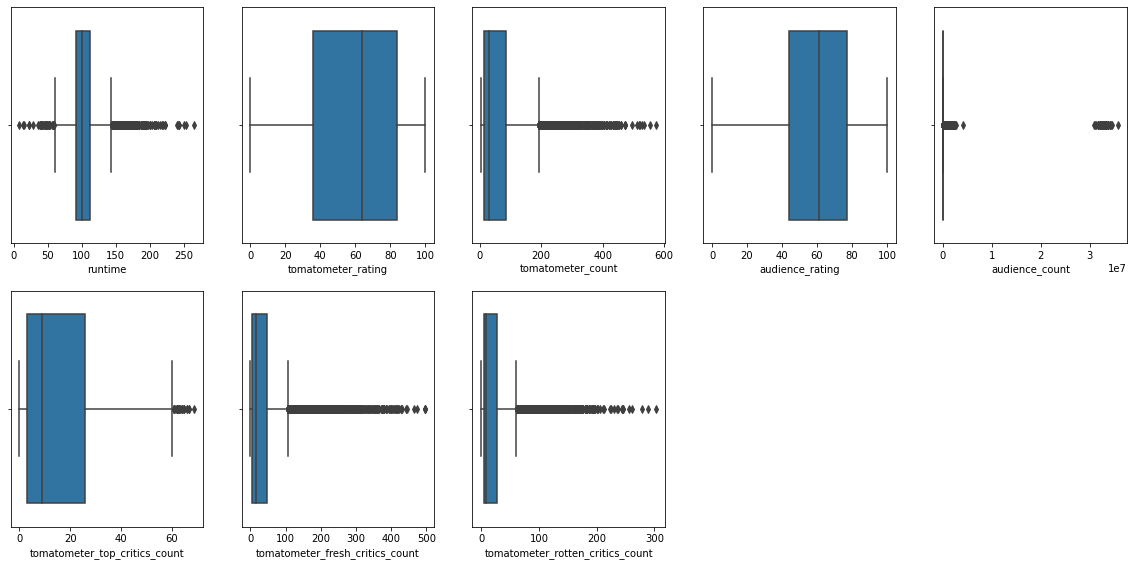

In [5]:
# Making loops to knew Outliers
df_describe = df[['runtime','tomatometer_rating','tomatometer_count','audience_rating','audience_count','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']]

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

## Univariate Analysis

This is the plot only for `Categorical Data`

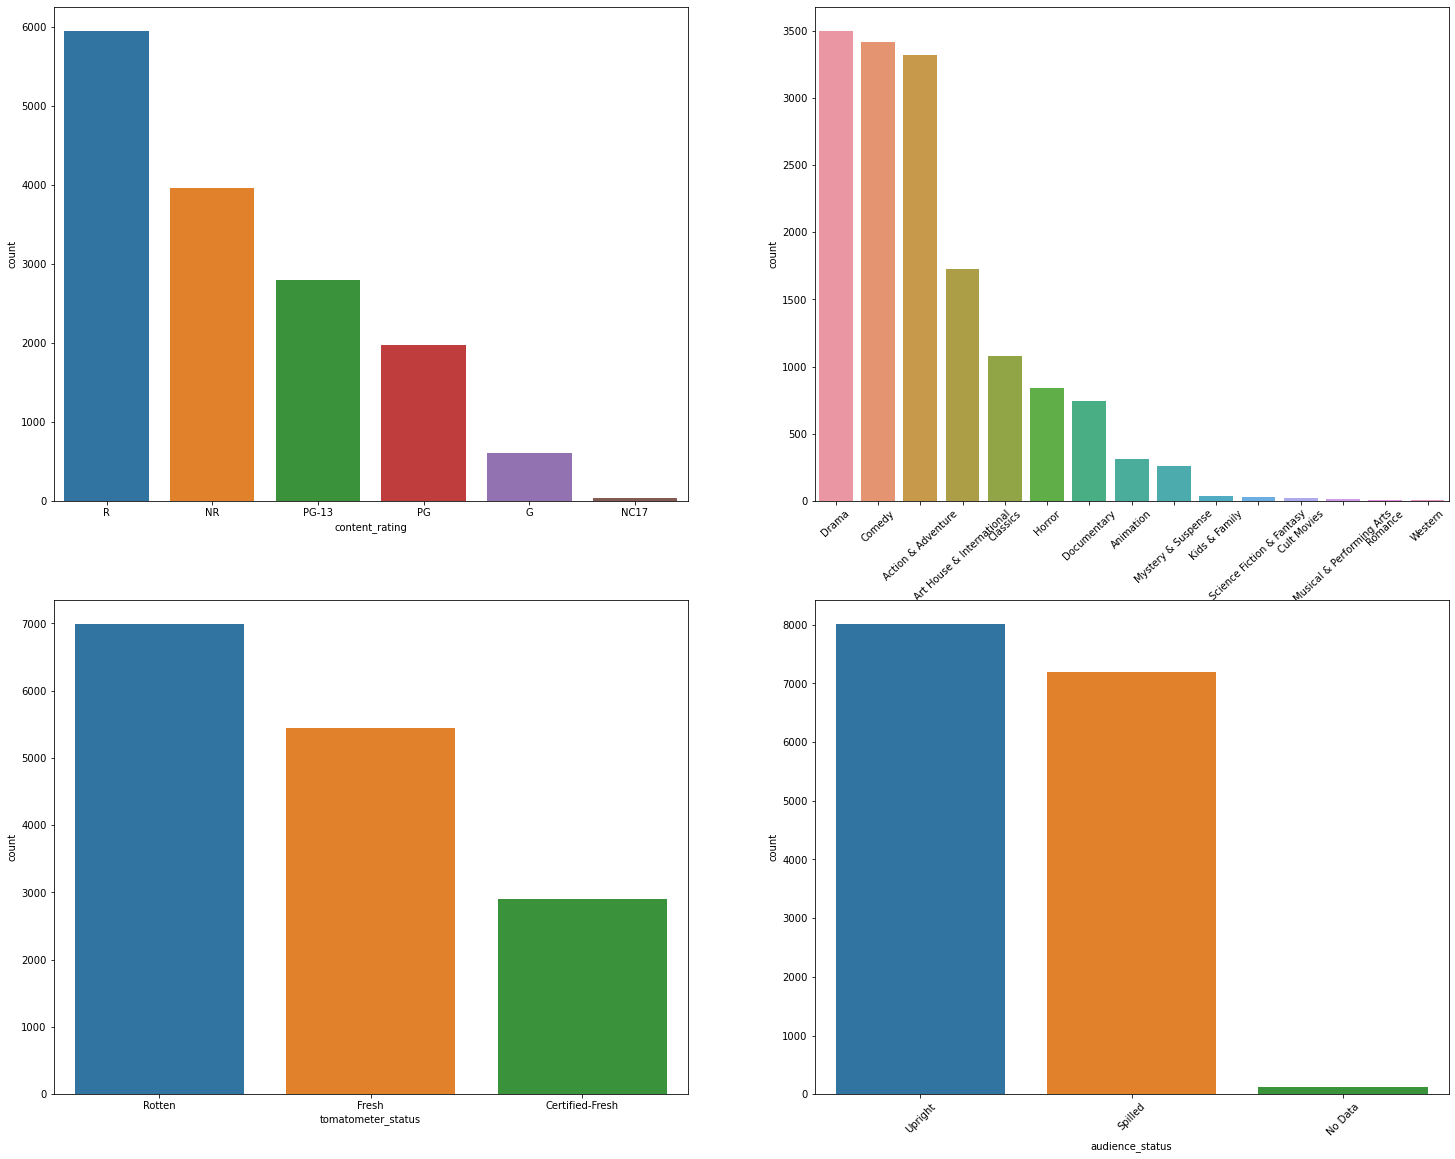

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (25,20))
plt.xticks(rotation=45)
sns.countplot(x='content_rating',order = df['content_rating'].value_counts().index, data=df, ax=axes[0][0])
genre = sns.countplot(x='Main_Genre',order = df['Main_Genre'].value_counts().index, data=df, ax=axes[0][1])
sns.countplot(x='tomatometer_status',order = df['tomatometer_status'].value_counts().index, data=df, ax=axes[1][0])
sns.countplot(x='audience_status',order = df['audience_status'].value_counts().index, data=df, ax=axes[1][1])
genre.set_xticklabels(genre.get_xticklabels(), rotation=43)
plt.show()


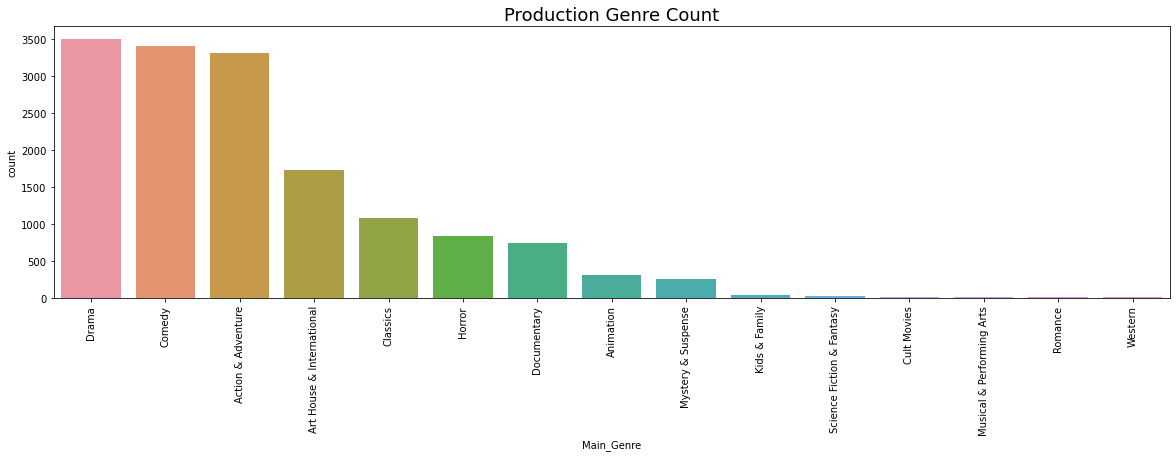

In [7]:
fig = plt.subplots(figsize = (20,5))
sns.countplot(x = 'Main_Genre', order = df['Main_Genre'].value_counts().index, data=df)
plt.xticks(rotation=90)
plt.title("Production Genre Count", size=18)
plt.show()

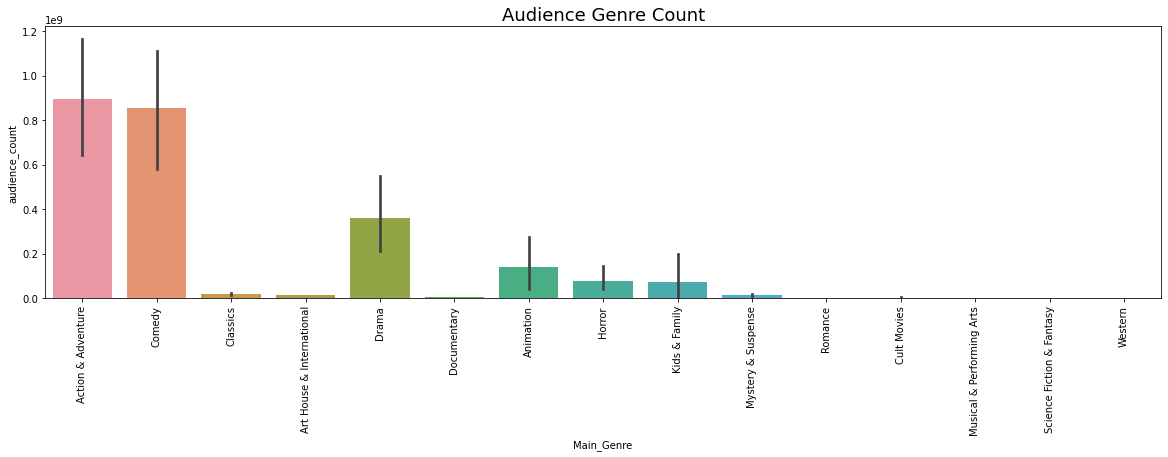

Main_Genre
Action & Adventure           895073770
Comedy                       852411848
Drama                        359357022
Animation                    140881592
Horror                        77454417
Kids & Family                 70865801
Classics                      18340345
Art House & International     14296235
Mystery & Suspense            12059447
Documentary                    4171803
Cult Movies                    2385123
Science Fiction & Fantasy      1723564
Musical & Performing Arts       808060
Western                         314866
Romance                          93825
Name: audience_count, dtype: int64

In [8]:
fig = plt.subplots(figsize = (20,5))
sns.barplot(x="Main_Genre", y="audience_count", data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title("Audience Genre Count", size=18)
plt.show()
audience_genre = df.groupby('Main_Genre')['audience_count'].agg('sum').sort_values(ascending=False)
display(audience_genre)

## Most Frequent Crew in Film 

This is the Top 10 Plot for the `Most Frequent` in Movies

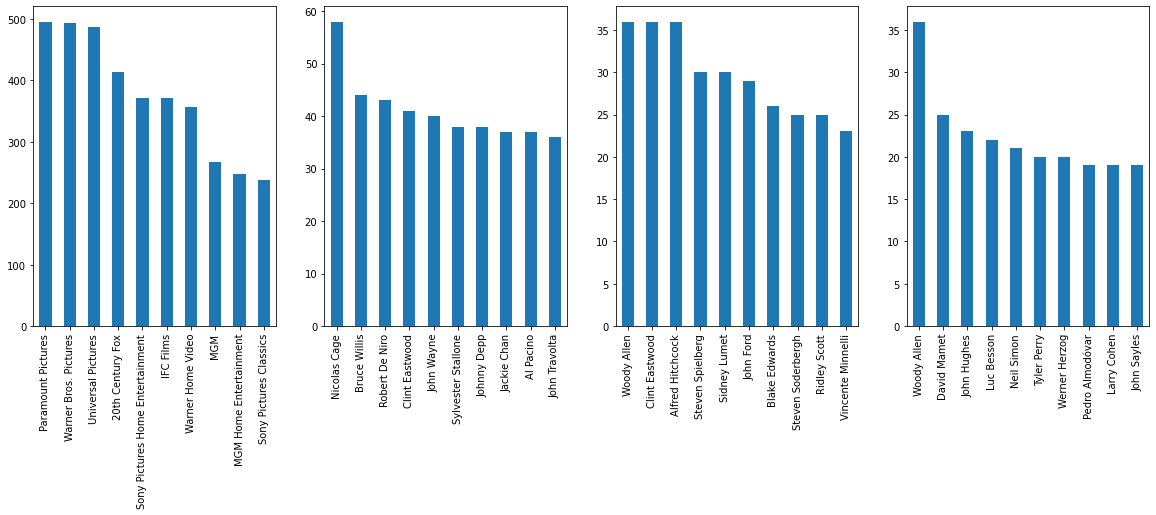

In [9]:
df_freq = df[['production_company','Main Character','Main Directors','Main Authors']]

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_freq.columns:
    plt.subplot(3,4,x)
    pd.Series(df_freq[column]).value_counts()[:10].plot(kind="bar")
    x+=1
plt.tight_layout
plt.show()

## Audience enthusiasm Year by Year

Audience enthusiams at its peak was at `2005` movies. I think there is several good movies in that year 

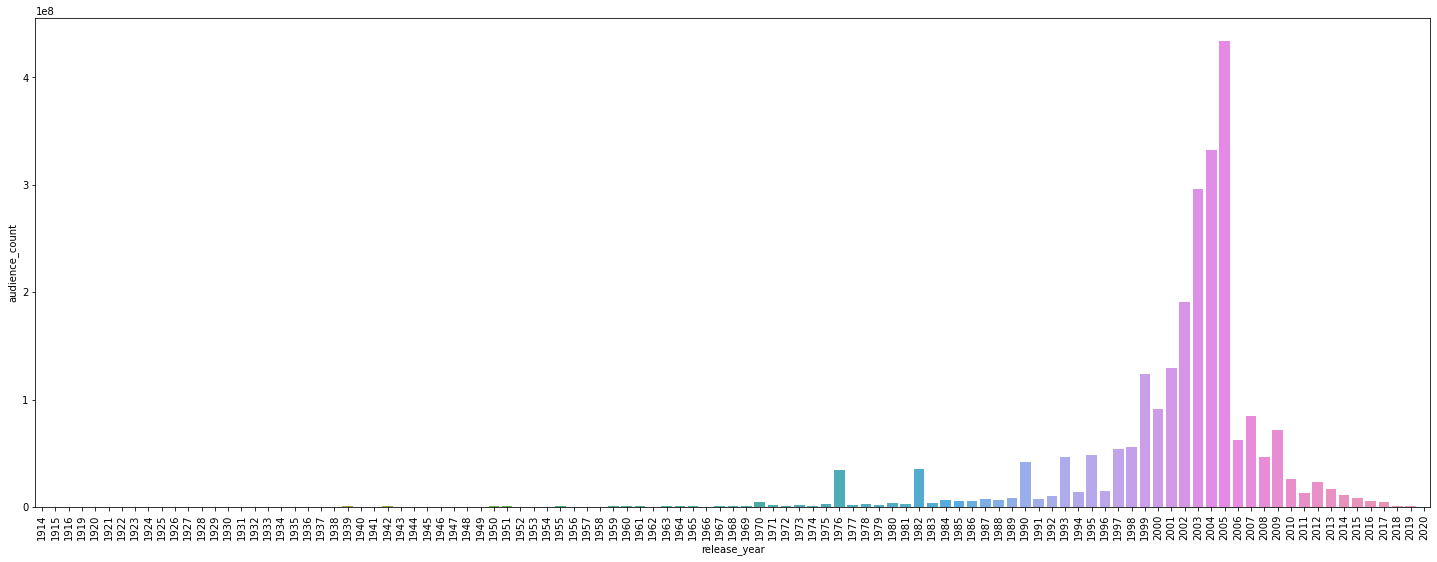

,release_year,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,2020,19843.0,12502.0,14694.0,12182.0,369392,2486,10364,4333
1,2019,43097.0,25505.0,41556.0,25691.0,1528600,7013,28463,13106
2,2018,55601.0,32134.0,50237.0,31192.0,1341120,9477,35019,15234
3,2017,52057.0,30072.0,48380.0,28648.0,4708069,10012,32838,15564
4,2016,53636.0,30954.0,47122.0,28849.0,6309161,10714,31265,15894


In [10]:
df['release_year'] = pd.DatetimeIndex(df['original_release_date']).year
group = df.groupby('release_year').sum().sort_values(by=['release_year'], ascending=False)
audience_yearly = group.reset_index()

plt.figure(figsize=(25,9))
sns.barplot(x='release_year', y='audience_count', data=audience_yearly)
plt.xticks(rotation=90)
plt.show()

display(audience_yearly.head())

## Does `tomatometer_status` affect?

It actually does effect the outcome. When `tomatometer_status` contain `Rotten` the mean audience is 122.459 and when `tomatometer_status` contain `Certified-Fresh` its 420.365

In [11]:
rot = df[df['tomatometer_status'].str.contains('Rotten')].mean()
fresh = df[df['tomatometer_status'].str.contains('Certified-Fresh')].mean()

display(rot)
display(fresh)

runtime                                101.061884
tomatometer_rating                      32.206946
tomatometer_count                       53.947263
audience_rating                         46.992711
audience_count                      122476.723882
tomatometer_top_critics_count           14.441189
tomatometer_fresh_critics_count         18.631985
tomatometer_rotten_critics_count        35.319566
release_year                          2001.827212
dtype: float64

runtime                                110.011023
tomatometer_rating                      86.968998
tomatometer_count                      125.406821
audience_rating                         76.685842
audience_count                      420365.820186
tomatometer_top_critics_count           29.649673
tomatometer_fresh_critics_count        108.845332
tomatometer_rotten_critics_count        16.601102
release_year                          2002.084395
dtype: float64

## MOST POPULAR MOVIES OF ALL TIME

### These are The Top 10 List Most Popular Movies of All Time

In [12]:
bin_audience =[0,100,1000,10000, 100000, 1000000, df['audience_count'].max()]
label_audience = ['BAD','NOT BAD', 'GOOD','GREAT','PERFECT', 'GODLIKE']
df['audience_group'] = pd.cut(df['audience_count'], bins = bin_audience, labels = label_audience)

popular_movies = df.sort_values(by='audience_count', ascending=False)
popular_movies.head(10)

,movie_title,movie_info,critics_consensus,content_rating,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,Main Character,Supporting Role,Main_Genre,Side Genre,Main Directors,Supporting Directors,Main Authors,Supporting Authors,release_year,audience_group
16297,Titanic,"James Cameron's ""Titanic"" is an epic, action-p...",A mostly unqualified triumph for James Cameron...,PG-13,1997-12-19,2014-06-01,195.0,Paramount Pictures,Certified-Fresh,89.0,192.0,Upright,69.0,35797635,62,171,21,Leonardo DiCaprio,"Kate Winslet, Billy Zane, Kathy Bates, Frances...",Drama,Romance,James Cameron,No Data,James Cameron,No Data,1997,GODLIKE
15410,The Lord of the Rings: The Return of the King,The culmination of nearly 10 years' work and c...,Visually breathtaking and emotionally powerful...,PG-13,2003-12-17,2010-04-06,200.0,New Line Cinema,Certified-Fresh,93.0,275.0,Upright,86.0,34679773,53,257,18,Elijah Wood,"Sean Astin, Ian McKellen, Andy Serkis, Viggo M...",Action & Adventure,"Classics, Science Fiction & Fantasy",Peter Jackson,No Data,Fran Walsh,"Philippa Boyens, Peter Jackson",2003,GODLIKE
13694,Spider-Man,"""Spider-Man"" centers on student Peter Parker (...",Not only does Spider-Man provide a good dose o...,PG-13,2002-05-03,2013-04-25,116.0,Columbia Pictures,Certified-Fresh,90.0,245.0,Upright,67.0,34297354,47,220,25,Tobey Maguire,"Kirsten Dunst, Willem Dafoe, James Franco, Cli...",Action & Adventure,"Mystery & Suspense, Science Fiction & Fantasy",Sam Raimi,No Data,David Koepp,No Data,2002,GODLIKE
13276,Shrek 2,After returning from their honeymoon and showi...,"It may not be as fresh as the original, but to...",PG,2004-05-19,2015-11-25,92.0,Dreamworks,Certified-Fresh,89.0,236.0,Upright,69.0,34232524,53,209,27,Mike Myers,"John Cleese, Jonathan Ross, Jennifer Saunders,...",Animation,"Comedy, Kids & Family, Science Fiction & Fantasy",Conrad Vernon,"Andrew Adamson, Kelly Asbury",Joe Stillman,"David N. Weiss, J. David Stern, J. David Stem,...",2004,GODLIKE
7526,Harry Potter and the Goblet of Fire,The fourth movie in the Harry Potter franchise...,"The main characters are maturing, and the film...",PG-13,2005-11-18,2008-01-01,157.0,Warner Bros. Pictures,Certified-Fresh,88.0,255.0,Upright,74.0,34153607,53,224,31,Daniel Radcliffe,"Rupert Grint, Emma Watson, Robbie Coltrane, Ra...",Action & Adventure,"Kids & Family, Science Fiction & Fantasy",Mike Newell,No Data,Steve Kloves,No Data,2005,GODLIKE
7052,Gladiator,Commodus (Joaquin Phoenix) takes power and str...,Ridley Scott and an excellent cast successfull...,R,2000-05-05,2013-08-01,154.0,Dreamworks Distribution LLC,Certified-Fresh,77.0,199.0,Upright,87.0,34128168,49,153,46,Russell Crowe,"Joaquin Phoenix, Connie Nielsen, Oliver Reed, ...",Action & Adventure,"Classics, Drama",Ridley Scott,No Data,David H. Franzoni,"William Nicholson, John Logan",2000,GODLIKE
4579,"The Chronicles of Narnia: The Lion, The Witch ...","During the World War II bombings of London, fo...",With first-rate special effects and compelling...,PG,2005-12-09,2016-05-27,140.0,Buena Vista,Certified-Fresh,76.0,218.0,Upright,61.0,34105114,48,166,52,Georgie Henley,"Skandar Keynes, William Moseley, Anna Popplewe...",Kids & Family,Science Fiction & Fantasy,Andrew Adamson,No Data,Ann Peacock,"Andrew Adamson, Christopher Markus, Stephen Mc...",2005,GODLIKE
2662,American Pie,A riotous and raunchy exploration of the most ...,"So embarrassing it's believable, American Pie ...",R,1999-07-09,2015-01-01,95.0,Universal Pictures,Fresh,61.0,129.0,Upright,61.0,33781574,29,79,50,Jason Biggs,"Mena Suvari, Alyson Hannigan, Shannon Elizabet...",Comedy,No Data,Paul Weitz,Chris Weitz,Adam Herz,Paul Weitz,1999,GODLIKE
9014,King Kong,Peter Jackson's expansive remake of the 1933 c...,"Featuring state-of-the-art special effects, te...",PG-13,2005-12-

## Bad Critics VS Good Critics

In this case there any correlation between `critics_consensus` and `audience_count` that contain bad in it and good in it 

In [13]:
bad = df[df['critics_consensus'].str.contains('bad')].mean()
good = df[df['critics_consensus'].str.contains('good')].mean()

print('Bad critics :')
display(bad)
print('Good critics :')
display(good)

Bad critics :


runtime                                103.356164
tomatometer_rating                      28.219178
tomatometer_count                       83.561644
audience_rating                         46.383562
audience_count                      108225.027397
tomatometer_top_critics_count           22.561644
tomatometer_fresh_critics_count         25.904110
tomatometer_rotten_critics_count        57.657534
release_year                          2003.506849
dtype: float64

Good critics :


runtime                                103.560209
tomatometer_rating                      55.492147
tomatometer_count                       99.125654
audience_rating                         60.057592
audience_count                      618667.193717
tomatometer_top_critics_count           24.853403
tomatometer_fresh_critics_count         59.083770
tomatometer_rotten_critics_count        40.062827
release_year                          2003.832461
dtype: float64

## The BIG 3

It is the Most Productive Company that make so many good movies

In [14]:
Paramount = df[df['production_company'].str.contains('Paramount Pictures')].sum()[['audience_count', 'tomatometer_count', 'tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']]
WarnerBros = df[df['production_company'].str.contains('Warner Bros. Pictures')].sum()[['audience_count', 'tomatometer_count', 'tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']]
Universal = df[df['production_company'].str.contains('Universal Pictures')].sum()[['audience_count', 'tomatometer_count', 'tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']]

print('Paramount:')
display(Paramount)
print('WarnerBros:')
display(WarnerBros)
print('Universal:')
print(Universal)


Paramount:


audience_count                      286541995
tomatometer_count                       42294
tomatometer_top_critics_count            9535
tomatometer_fresh_critics_count         25278
tomatometer_rotten_critics_count        17020
dtype: object

WarnerBros:


audience_count                      315140387
tomatometer_count                       66026
tomatometer_top_critics_count           14635
tomatometer_fresh_critics_count         37664
tomatometer_rotten_critics_count        28387
dtype: object

Universal:
audience_count                      369500073
tomatometer_count                       58738
tomatometer_top_critics_count           12948
tomatometer_fresh_critics_count         34189
tomatometer_rotten_critics_count        24571
dtype: object


## Star Effect

In this case there is a correlation between Actors and the audience For this film

In [15]:
# Counting Main Character and Audience_count to see if there is 
mean_audience = df.groupby('Main Character')['audience_count'].agg(['mean','count']).sort_values(by = 'mean',ascending=False) 
sum_audience = df.groupby('Main Character')['audience_count'].agg(['sum','count']).sort_values(by = 'sum',ascending=False)

display(mean_audience.head())
display(sum_audience.head())

,mean,count
Main Character,,
Eminem,32167884.0,1
Larisa Oleynik,32104911.0,1
Shawn Wayans,16378712.0,2
Craig T. Nelson,16311287.0,2
Georgie Henley,8704007.0,4


,sum,count
Main Character,,
Johnny Depp,79136870,38
Adam Sandler,76889197,32
Jim Carrey,73118872,20
Naomi Watts,66803414,16
Leonardo DiCaprio,43250257,21


## Production companies Exploratory

In [16]:
hm = df.groupby(['production_company','Main_Genre'])['audience_count'].agg(['sum','count']).sort_values(by = 'sum',ascending=False)
hmm = df.groupby('production_company')['audience_count'].agg(['sum','count']).sort_values(by = 'sum',ascending=False)

display(hmm.head(10))
display(hm.head(10))

,sum,count
production_company,,
Universal Pictures,336188446,487
Warner Bros. Pictures,310321272,494
Paramount Pictures,286342578,496
20th Century Fox,210926384,414
New Line Cinema,127585250,141
Buena Vista Pictures,117791629,103
Sony Pictures,93485024,171
Columbia Pictures,91144442,234
Buena Vista,89587059,94


sum  count
production_company    Main_Genre                          
Universal Pictures    Comedy              190768621    153
Warner Bros. Pictures Action & Adventure  175446365    190
20th Century Fox      Action & Adventure  136589226    156
Paramount Pictures    Comedy              116938127    115
                      Action & Adventure   87526606    153
Warner Bros. Pictures Comedy               79314241    101
Paramount Pictures    Drama                74232591     79
Sony Pictures         Comedy               70931587     39
Universal Pictures    Action & Adventure   63780669    143
20th Century Fox      Comedy               57541137    110

## Machine Learning

## Binning

Binning is important key to know the value of `actors` , `director` , `author` and `production_company`

In [17]:
df['actor_audience'] = df.groupby('Main Character')['audience_count'].transform('sum')
bin_actor =[0,100,1000,10000, 100000, 1000000, 10000000, df['actor_audience'].max()]
label_actor = ['WHO?','NOT POPULAR', 'NOT THAT POPULAR','PRETTY DECENT','POPULAR','SUPER POPULAR', 'WORLDCLASS']
df['actor_popularity'] = pd.cut(df['actor_audience'], bins = bin_actor, labels = label_actor)

df['director_audience'] = df.groupby('Main Directors')['audience_count'].transform('sum')
bin_direct =[0,100,1000,10000, 100000, 1000000, 10000000, df['director_audience'].max()]
label_direct = ['WHO?','NOT POPULAR', 'NOT THAT POPULAR','PRETTY DECENT','POPULAR','SUPER POPULAR', 'WORLDCLASS']
df['director_popularity'] = pd.cut(df['director_audience'], bins = bin_direct, labels = label_direct)

df['author_audience'] = df.groupby('Main Authors')['audience_count'].transform('sum')
bin_author =[0,100,1000,10000, 100000, 1000000, 10000000, df['author_audience'].max()]
label_author = ['WHO?','NOT POPULAR', 'NOT THAT POPULAR','PRETTY DECENT','POPULAR','SUPER POPULAR', 'WORLDCLASS']
df['author_popularity'] = pd.cut(df['author_audience'], bins = bin_author, labels = label_author)

df['production_company_audience'] = df.groupby('production_company')['audience_count'].transform('sum')
bin_production =[0,100,1000,10000, 100000, 1000000, 10000000, df['production_company_audience'].max()]
label_production = ['WHO?','NOT POPULAR', 'NOT THAT POPULAR','PRETTY DECENT','POPULAR','SUPER POPULAR', 'WORLDCLASS']
df['production_company_popularity'] = pd.cut(df['production_company_audience'], bins = bin_production, labels = label_production)

df.sort_values(by='actor_audience', ascending=False).head()

,movie_title,movie_info,critics_consensus,content_rating,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,Main Character,Supporting Role,Main_Genre,Side Genre,Main Directors,Supporting Directors,Main Authors,Supporting Authors,release_year,audience_group,actor_audience,actor_popularity,director_audience,director_popularity,author_audience,author_popularity,production_company_audience,production_company_popularity
6787,From Hell,The first tabloid star of the twentieth centur...,"Visually impressive, but this latest Ripper ta...",R,2001-10-19,2015-11-25,121.0,20th Century Fox,Rotten,57.0,151.0,Upright,66.0,203221,37,86,65,Johnny Depp,"Heather Graham, Ian Holm, Ian Richardson, Robb...",Horror,Mystery & Suspense,Allen Hughes,Albert Hughes,Terry Hayes,"Rafael Yglesias, Albert Hughes, Allen Hughes",2001,PERFECT,79136870,WORLDCLASS,298369,POPULAR,488033,POPULAR,210926384,WORLDCLASS
4900,Tim Burton's Corpse Bride,Victor (Johnny Depp) and Victoria's (Emily Wat...,"As can be expected from a Tim Burton movie, Co...",PG,2005-09-16,2008-07-21,76.0,Warner Bros. Pictures,Certified-Fresh,84.0,196.0,Upright,77.0,553417,40,165,31,Johnny Depp,"Helena Bonham Carter, Emily Watson, Tracey Ull...",Action & Adventure,"Animation, Comedy, Kids & Family, Science Fict...",Tim Burton,Mike Johnson,John August,"Pamela Pettler, Caroline Thompson",2005,PERFECT,79136870,WORLDCLASS,40346913,WORLDCLASS,2002853,SUPER POPULAR,310321272,WORLDCLASS
6285,Fantastic Beasts: The Crimes of Grindelwald,In an effort to thwart Grindelwald's plans of ...,Fantastic Beasts: The Crimes of Grindelwald ha...,PG-13,2018-11-16,2019-02-14,134.0,Warner Bros. Pictures,Rotten,36.0,323.0,Spilled,54.0,15125,42,117,206,Johnny Depp,"Kevin Guthrie, Carmen Ejogo, Wolf Roth, Eddie ...",Action & Adventure,"Kids & Family, Science Fiction & Fantasy",David Yates (II),No Data,J.K. Rowling,No Data,2018,GREAT,79136870,WORLDCLASS,4798036,SUPER POPULAR,103105,POPULAR,310321272,WORLDCLASS
10602,Mortdecai,Charismatic British aristocrat and part-time s...,"Aggressively strange and willfully unfunny, th...",R,2015-01-23,2016-06-28,106.0,Liongate Films,Rotten,12.0,110.0,Spilled,30.0,25307,25,13,97,Johnny Depp,"Gwyneth Paltrow, Ewan McGregor, Olivia Munn, J...",Action & Adventure,No Data,David Koepp,No Data,Eric Aronson,David Koepp,2015,GREAT,79136870,WORLDCLASS,1087447,SUPER POPULAR,25307,PRETTY DECENT,96621,PRETTY DECENT
5887,Ed Wood,Because of his eccentric habits and bafflingly...,Tim Burton and Johnny Depp team up to fete the...,R,1994-09-28,2016-10-11,124.0,Buena Vista Pictures,Certified-Fresh,92.0,65.0,Upright,88.0,107229,14,60,5,Johnny Depp,"Martin Landau, Sarah Jessica Parker, Patricia ...",Comedy,Drama,Tim Burton,No Data,Scott Alexander,Larry Karaszewski,1994,PERFECT,79136870,WORLDCLASS,40346913,WORLDCLASS,383034,POPULAR,117791629,WORLDCLASS


## Machine Learning

`Feature Selection`

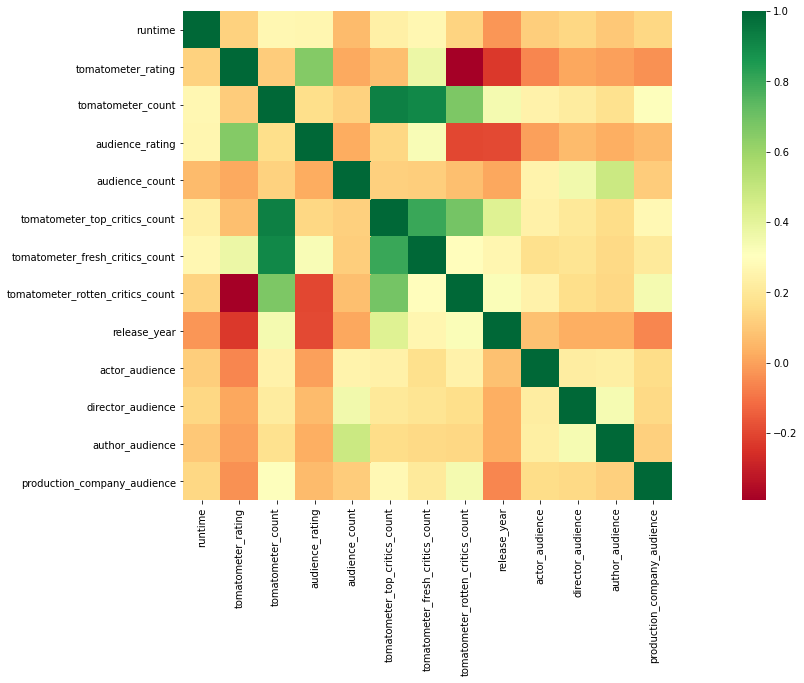

runtime                             0.064479
tomatometer_rating                  0.019739
tomatometer_count                   0.126302
audience_rating                     0.027693
audience_count                      1.000000
tomatometer_top_critics_count       0.124078
tomatometer_fresh_critics_count     0.119727
tomatometer_rotten_critics_count    0.075557
release_year                        0.014863
actor_audience                      0.254347
director_audience                   0.355090
author_audience                     0.482554
production_company_audience         0.111080
Name: audience_count, dtype: float64


In [18]:
plt.figure(figsize=(25,9))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()
print(df.corr()['audience_count'])

In [19]:
df_ml = df[['audience_count','content_rating','runtime','production_company_popularity','actor_popularity','Main_Genre','director_popularity','author_popularity','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']]

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [21]:
X = df_ml.drop(columns='audience_count')
y = (df_ml['audience_count'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=69)

In [23]:
cat_columns = ['content_rating','production_company_popularity','actor_popularity','Main_Genre','director_popularity','author_popularity']

### Importing package

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Pipeline

In [25]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, cat_columns),
])

pipe_LR = Pipeline([
    ("prep", preprocessor),
    ("algo", LinearRegression())
])

pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestRegressor())
])

pipe_XGB = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBRegressor())
])

pipe_DT = Pipeline([
    ("prep", preprocessor),
    ("algo", DecisionTreeRegressor())
])

In [26]:
X_train_cat = categorical_pipeline.fit_transform(X_train[cat_columns])

In [27]:
X_train_prep = preprocessor.fit_transform(X_train)

In [28]:
X_test_prep = preprocessor.fit_transform(X_test)

# Base Model

In [29]:
lr_pipe = pipe_LR.fit(X_train, y_train)

In [30]:
lr_pipe_train = lr_pipe.predict(X_train)
lr_pipe_test = lr_pipe.predict(X_test)

In [31]:
#linreg Train
LinReg_R2_train = r2_score(y_train, lr_pipe_train)
LinReg_MAE_train = mean_absolute_error(y_train, lr_pipe_train)
LinReg_MSE_train = mean_squared_error(y_train, lr_pipe_train)
LinReg_RMSE_train = np.sqrt(LinReg_MSE_train)
#linreg Test
LinReg_R2_test = r2_score(y_test, lr_pipe_test)
LinReg_MAE_test = mean_absolute_error(y_test, lr_pipe_test)
LinReg_MSE_test = mean_squared_error(y_test, lr_pipe_test)
LinReg_RMSE_test = np.sqrt(LinReg_MSE_test)

In [32]:
baseModelLR = pd.DataFrame({
    "R2 Score" : [LinReg_R2_train,LinReg_R2_test],
    "MAE" : [LinReg_MAE_train,LinReg_MAE_test],
    "MSE" : [LinReg_MSE_train,LinReg_MSE_test],
    "RMSE" : [LinReg_RMSE_train,LinReg_RMSE_test]
}, index = ["LinReg Train", "LinReg Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelLR)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
LinReg Train,0.305230,362292.617690,2.455876e+12,1.567124e+06
LinReg Test,0.316029,343396.016053,2.154061e+12,1.467672e+06


In [35]:
xgb_pipe_train = xgb_pipe.predict(X_train)
xgb_pipe_test = xgb_pipe.predict(X_test)

In [36]:
#xgb Train
xgb_R2_train = r2_score(y_train, xgb_pipe_train)
xgb_MAE_train = mean_absolute_error(y_train, xgb_pipe_train)
xgb_MSE_train = mean_squared_error(y_train, xgb_pipe_train)
xgb_RMSE_train = np.sqrt(xgb_MSE_train)
#xgb Test
xgb_R2_test = r2_score(y_test, xgb_pipe_test)
xgb_MAE_test = mean_absolute_error(y_test, xgb_pipe_test)
xgb_MSE_test = mean_squared_error(y_test, xgb_pipe_test)
xgb_RMSE_test = np.sqrt(xgb_MSE_test)

In [37]:
baseModelxgb = pd.DataFrame({
    "R2 Score" : [xgb_R2_train,xgb_R2_test],
    "MAE" : [xgb_MAE_train,xgb_MAE_test],
    "MSE" : [xgb_MSE_train,xgb_MSE_test],
    "RMSE" : [xgb_RMSE_train,xgb_RMSE_test]
}, index = ["XGB Train", "XGB Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelxgb)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
XGB Train,0.935856,48215.010313,2.267356e+11,476167.638633
XGB Test,0.887415,55472.740671,3.545698e+11,595457.632725


## Decision Tree

In [38]:
dt_pipe = pipe_DT.fit(X_train, y_train)

In [39]:
dt_pipe_train = dt_pipe.predict(X_train)
dt_pipe_test = dt_pipe.predict(X_test)

In [40]:
#dt Train
dt_R2_train = r2_score(y_train, dt_pipe_train)
dt_MAE_train = mean_absolute_error(y_train, dt_pipe_train)
dt_MSE_train = mean_squared_error(y_train, dt_pipe_train)
dt_RMSE_train = np.sqrt(dt_MSE_train)
#dt Test
dt_R2_test = r2_score(y_test, dt_pipe_test)
dt_MAE_test = mean_absolute_error(y_test, dt_pipe_test)
dt_MSE_test = mean_squared_error(y_test, dt_pipe_test)
dt_RMSE_test = np.sqrt(dt_MSE_test)

In [41]:
baseModeldt = pd.DataFrame({
    "R2 Score" : [dt_R2_train,dt_R2_test],
    "MAE" : [dt_MAE_train,dt_MAE_test],
    "MSE" : [dt_MSE_train,dt_MSE_test],
    "RMSE" : [dt_RMSE_train,dt_RMSE_test]
}, index = ["DT Train", "DT Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModeldt)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
DT Train,0.936074,42748.249613,2.259654e+11,475358.166973
DT Test,0.884772,55646.049891,3.628942e+11,602406.976421


## Random Forest

In [42]:
rf_pipe = pipe_RF.fit(X_train, y_train)

In [43]:
rf_pipe_train = rf_pipe.predict(X_train)
rf_pipe_test = rf_pipe.predict(X_test)

In [44]:
#rf Train
rf_R2_train = r2_score(y_train, rf_pipe_train)
rf_MAE_train = mean_absolute_error(y_train, rf_pipe_train)
rf_MSE_train = mean_squared_error(y_train, rf_pipe_train)
rf_RMSE_train = np.sqrt(rf_MSE_train)
#rf Test
rf_R2_test = r2_score(y_test, rf_pipe_test)
rf_MAE_test = mean_absolute_error(y_test, rf_pipe_test)
rf_MSE_test = mean_squared_error(y_test, rf_pipe_test)
rf_RMSE_test = np.sqrt(rf_MSE_test)

In [45]:
baseModelrf = pd.DataFrame({
    "R2 Score" : [rf_R2_train,rf_R2_test],
    "MAE" : [rf_MAE_train,rf_MAE_test],
    "MSE" : [rf_MSE_train,rf_MSE_test],
    "RMSE" : [rf_RMSE_train,rf_RMSE_test]
}, index = ["RF Train", "RF Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelrf)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
RF Train,0.926675,47334.258743,2.591909e+11,509107.979524
RF Test,0.889817,53660.654465,3.470043e+11,589070.674892


## Sumarry

In [46]:
data = {"Linreg Score" : [LinReg_R2_train,LinReg_R2_test],
        "Linreg MAE" : [LinReg_MAE_train,LinReg_MAE_test],
        "Linreg MSE" : [LinReg_MSE_train,LinReg_MSE_test],
        "Linreg RMSE" : [LinReg_RMSE_train,LinReg_RMSE_test],
        "DT Score" : [dt_R2_train,dt_R2_test],
        "DT MAE" : [dt_MAE_train,dt_MAE_test],
        "DT MSE" : [dt_MSE_train,dt_MSE_test],
        "DT RMSE" : [dt_RMSE_train,dt_RMSE_test],
        "XGB Score" : [xgb_R2_train,xgb_R2_test],
        "XGB MAE" : [xgb_MAE_train,xgb_MAE_test],
        "XGB MSE" : [xgb_MSE_train,xgb_MSE_test],
        "XGB RMSE" : [xgb_RMSE_train,xgb_RMSE_test],
        "RF Score" : [rf_R2_train,rf_R2_test],
        "RF MAE" : [rf_MAE_train,rf_MAE_test],
        "RF MSE" : [rf_MSE_train,rf_MSE_test],
        "RF RMSE" : [rf_RMSE_train,rf_RMSE_test]
    
}

In [47]:
df_score =  pd.DataFrame(data = data, index = ['Train','Test'])

In [48]:
df_score

,Linreg Score,Linreg MAE,Linreg MSE,Linreg RMSE,DT Score,DT MAE,DT MSE,DT RMSE,XGB Score,XGB MAE,XGB MSE,XGB RMSE,RF Score,RF MAE,RF MSE,RF RMSE
Train,0.305230,362292.617690,2.455876e+12,1.567124e+06,0.936074,42748.249613,2.259654e+11,475358.166973,0.935856,48215.010313,2.267356e+11,476167.638633,0.926675,47334.258743,2.591909e+11,509107.979524
Test,0.316029,343396.016053,2.154061e+12,1.467672e+06,0.884772,55646.049891,3.628942e+11,602406.976421,0.887415,55472.740671,3.545698e+11,595457.632725,0.889817,53660.654465,3.470043e+11,589070.674892


## Hyper Tuning

### Decision Tree Tuned

In [49]:
pipe_DT.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['content_rating',
                                     'production_company_popularity',
                                     'actor_popularity', 'Main_Genre',
                                     'director_popularity',
                                     'author_popularity'])])),
  ('algo', DecisionTreeRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('encoder', OneHotEncoder())]),
                                  ['content_rating',
                                   'production_company_popularity',
                                   'actor_popularity', 'Main_Genre',
                                   'director_popularity',
                                   'author_popularity'])]),
 'alg

In [50]:
param_DT = {'algo__max_depth':[ None, 3, 5, 7, 10 ],
            'algo__min_samples_split':[ 21,33,40,47,50],
            'algo__min_samples_leaf':[ 5,7,8,9,12],
            'algo__max_features':[None,0.1,0.3,0.5,0.7]}

In [51]:
model_DT = GridSearchCV(estimator = pipe_DT, param_grid=param_DT, n_jobs = -1, cv=5, verbose =1)

In [52]:
model_DT.fit(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1652 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 2752 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3125 out of 3125 | elapsed:   51.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['content_rating',
                                                                          'production_company_popularity',
                                                                          'actor_popularity',
                                                                          'Main_Genre',
                                                                          'director_popularity',
                                                                          'author_popularity'])])),
                                       ('algo', Decision

In [53]:
DT_tuned = model_DT.best_estimator_

In [54]:
model_DT.best_params_

{'algo__max_depth': None,
 'algo__max_features': 0.5,
 'algo__min_samples_leaf': 5,
 'algo__min_samples_split': 21}

In [55]:
dt_pipe_train_tuned = DT_tuned.predict(X_train)
dt_pipe_test_tuned = DT_tuned.predict(X_test)

In [56]:
#dt Train tuned
dt_R2_train_tuned = r2_score(y_train, dt_pipe_train_tuned)
dt_MAE_train_tuned = mean_absolute_error(y_train, dt_pipe_train_tuned)
dt_MSE_train_tuned = mean_squared_error(y_train, dt_pipe_train_tuned)
dt_RMSE_train_tuned = np.sqrt(dt_MSE_train_tuned)
#dt Test tuned
dt_R2_test_tuned = r2_score(y_test, dt_pipe_test_tuned)
dt_MAE_test_tuned = mean_absolute_error(y_test, dt_pipe_test_tuned)
dt_MSE_test_tuned = mean_squared_error(y_test, dt_pipe_test_tuned)
dt_RMSE_test_tuned = np.sqrt(dt_MSE_test_tuned)

In [57]:
baseModeldtTuned = pd.DataFrame({
    "R2 Score" : [dt_R2_train_tuned,dt_R2_test_tuned],
    "MAE" : [dt_MAE_train_tuned,dt_MAE_test_tuned],
    "MSE" : [dt_MSE_train_tuned,dt_MSE_test_tuned],
    "RMSE" : [dt_RMSE_train_tuned,dt_RMSE_test_tuned]
}, index = ["DT Train Tuned", "DT Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModeldtTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
DT Train Tuned,0.892744,59840.720206,3.791290e+11,615734.560154
DT Test Tuned,0.893519,62290.022718,3.353449e+11,579089.753555


## Random Forest Tuned

In [58]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['content_rating',
                                     'production_company_popularity',
                                     'actor_popularity', 'Main_Genre',
                                     'director_popularity',
                                     'author_popularity'])])),
  ('algo', RandomForestRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('encoder', OneHotEncoder())]),
                                  ['content_rating',
                                   'production_company_popularity',
                                   'actor_popularity', 'Main_Genre',
                                   'director_popularity',
                                   'author_popularity'])]),
 'alg

In [59]:
param_RF = {'algo__max_depth':[None, 5, 9],
            'algo__min_samples_split':[2, 5, 9],
            'algo__min_samples_leaf':[1, 5, 10],
            'algo__max_features':[None,0.2,0.5],
           'algo__n_estimators':[100, 200, 450]}

In [60]:
model_RF = RandomizedSearchCV(estimator = pipe_RF, param_distributions=param_RF, n_jobs = -1, cv=3, verbose =1)

In [61]:
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.3s finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder())]),
                                                                               ['content_rating',
                                                                                'production_company_popularity',
                                                                                'actor_popularity',
                                                                                'Main_Genre',
                                                                                'director_popularity',
                                                                                'author_populari

In [62]:
RF_tuned = model_RF.best_estimator_

In [63]:
model_RF.best_params_

{'algo__n_estimators': 100,
 'algo__min_samples_split': 9,
 'algo__min_samples_leaf': 5,
 'algo__max_features': 0.5,
 'algo__max_depth': 9}

In [64]:
RF_pipe_train_tuned = RF_tuned.predict(X_train)
RF_pipe_test_tuned = RF_tuned.predict(X_test)

In [65]:
#RF Train tuned
RF_R2_train_tuned = r2_score(y_train, RF_pipe_train_tuned)
RF_MAE_train_tuned = mean_absolute_error(y_train, RF_pipe_train_tuned)
RF_MSE_train_tuned = mean_squared_error(y_train, RF_pipe_train_tuned)
RF_RMSE_train_tuned = np.sqrt(RF_MSE_train_tuned)
#RF Test tuned
RF_R2_test_tuned = r2_score(y_test, RF_pipe_test_tuned)
RF_MAE_test_tuned = mean_absolute_error(y_test, RF_pipe_test_tuned)
RF_MSE_test_tuned = mean_squared_error(y_test, RF_pipe_test_tuned)
RF_RMSE_test_tuned = np.sqrt(RF_MSE_test_tuned)

In [66]:
baseModelRFTuned = pd.DataFrame({
    "R2 Score" : [RF_R2_train_tuned,RF_R2_test_tuned],
    "MAE" : [RF_MAE_train_tuned,RF_MAE_test_tuned],
    "MSE" : [RF_MSE_train_tuned,RF_MSE_test_tuned],
    "RMSE" : [RF_RMSE_train_tuned,RF_RMSE_test_tuned]
}, index = ["RF Train Tuned", "RF Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelRFTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
RF Train Tuned,0.864700,77530.601735,4.782589e+11,691562.624045
RF Test Tuned,0.868825,76216.950949,4.131150e+11,642740.232869


## XGB Tuned

In [67]:
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['content_rating',
                                     'production_company_popularity',
                                     'actor_popularity', 'Main_Genre',
                                     'director_popularity',
                                     'author_popularity'])])),
  ('algo',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos

In [68]:
param_XGB = {'algo__max_depth':[3,5,7,9],
             'algo__learning_rate':[0.1,0.2,0.5,1],
             'algo__n_estimators':[100,200,300],
             'algo__gamma':[0,3,5]}

In [69]:
model_XGB = GridSearchCV(estimator = pipe_XGB, param_grid=param_XGB, n_jobs = -1, cv=3, verbose =1)

In [70]:
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.5min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['content_rating',
                                                                          'production_company_popularity',
                                                                          'actor_popularity',
                                                                          'Main_Genre',
                                                                          'director_popularity',
                                                                          'author_popularity'])])),
                                       ('algo',
        

In [71]:
XGB_tuned = model_XGB.best_estimator_

In [72]:
model_XGB.best_params_

{'algo__gamma': 0,
 'algo__learning_rate': 0.1,
 'algo__max_depth': 5,
 'algo__n_estimators': 100}

In [73]:
xgb_pipe_train_tuned = XGB_tuned.predict(X_train)
xgb_pipe_test_tuned = XGB_tuned.predict(X_test)

In [74]:
#xgb Train tuned
xgb_R2_train_tuned = r2_score(y_train, xgb_pipe_train_tuned)
xgb_MAE_train_tuned = mean_absolute_error(y_train, xgb_pipe_train_tuned)
xgb_MSE_train_tuned = mean_squared_error(y_train, xgb_pipe_train_tuned)
xgb_RMSE_train_tuned = np.sqrt(xgb_MSE_train_tuned)
#dt Test tuned
xgb_R2_test_tuned = r2_score(y_test, xgb_pipe_test_tuned)
xgb_MAE_test_tuned = mean_absolute_error(y_test, xgb_pipe_test_tuned)
xgb_MSE_test_tuned = mean_squared_error(y_test, xgb_pipe_test_tuned)
xgb_RMSE_test_tuned = np.sqrt(xgb_MSE_test_tuned)

In [75]:
baseModelxgbTuned = pd.DataFrame({
    "R2 Score" : [xgb_R2_train_tuned,xgb_R2_test_tuned],
    "MAE" : [xgb_MAE_train_tuned,xgb_MAE_test_tuned],
    "MSE" : [xgb_MSE_train_tuned,xgb_MSE_test_tuned],
    "RMSE" : [xgb_RMSE_train_tuned,xgb_RMSE_test_tuned]
}, index = ["xgb Train Tuned", "xgb Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelxgbTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
xgb Train Tuned,0.932512,55708.788328,2.385583e+11,488424.287637
xgb Test Tuned,0.902808,58643.933565,3.060908e+11,553254.762095


In [76]:
data2 = {'DT_Tuned_Score' : [dt_R2_train_tuned,dt_R2_test_tuned],
         "DT_Tuned_MAE" : [dt_MAE_train_tuned,dt_MAE_test_tuned],
         "DT_Tuned_MSE" : [dt_MSE_train_tuned,dt_MSE_test_tuned],
         "DT_Tuned_RMSE" : [dt_RMSE_train_tuned,dt_RMSE_test_tuned],
         "XGB_tuned_Score" : [xgb_R2_train_tuned,xgb_R2_test_tuned],
         "XGB_tuned_MAE" : [xgb_MAE_train_tuned,xgb_MAE_test_tuned],
         "XGB_tuned_MSE" : [xgb_MSE_train_tuned,xgb_MSE_test_tuned],
         "XGB_tuned_RMSE" : [xgb_RMSE_train_tuned,xgb_RMSE_test_tuned],
         "RF_tuned_Score" : [RF_R2_train_tuned,RF_R2_test_tuned],
         "RF_tuned_MAE" : [RF_MAE_train_tuned,RF_MAE_test_tuned],
         "RF_tuned_MSE" : [RF_MSE_train_tuned,RF_MSE_test_tuned],
         "RF_tuned_RMSE" : [RF_RMSE_train_tuned,RF_RMSE_test_tuned]
         
}

In [77]:
df_score2 =  pd.DataFrame(data = data2, index = ['Train','Test'])
display(df_score)
display(df_score2)

,Linreg Score,Linreg MAE,Linreg MSE,Linreg RMSE,DT Score,DT MAE,DT MSE,DT RMSE,XGB Score,XGB MAE,XGB MSE,XGB RMSE,RF Score,RF MAE,RF MSE,RF RMSE
Train,0.305230,362292.617690,2.455876e+12,1.567124e+06,0.936074,42748.249613,2.259654e+11,475358.166973,0.935856,48215.010313,2.267356e+11,476167.638633,0.926675,47334.258743,2.591909e+11,509107.979524
Test,0.316029,343396.016053,2.154061e+12,1.467672e+06,0.884772,55646.049891,3.628942e+11,602406.976421,0.887415,55472.740671,3.545698e+11,595457.632725,0.889817,53660.654465,3.470043e+11,589070.674892


,DT_Tuned_Score,DT_Tuned_MAE,DT_Tuned_MSE,DT_Tuned_RMSE,XGB_tuned_Score,XGB_tuned_MAE,XGB_tuned_MSE,XGB_tuned_RMSE,RF_tuned_Score,RF_tuned_MAE,RF_tuned_MSE,RF_tuned_RMSE
Train,0.892744,59840.720206,3.791290e+11,615734.560154,0.932512,55708.788328,2.385583e+11,488424.287637,0.864700,77530.601735,4.782589e+11,691562.624045
Test,0.893519,62290.022718,3.353449e+11,579089.753555,0.902808,58643.933565,3.060908e+11,553254.762095,0.868825,76216.950949,4.131150e+11,642740.232869


## Testing New Data

In [89]:
data_tes = [{
    'content_rating' : 'PG',
    'runtime': 119.0,
    'production_company_popularity': 'WORLDCLASS',
    'actor_popularity': 'WORLDCLASS',
    'Main_Genre': 'Action & Adventure',
    'director_popularity': 'WORLDCLASS',
    'author_popularity': 'SUPER POPULAR',
    'tomatometer_top_critics_count': 30,
    'tomatometer_fresh_critics_count': 15,
    'tomatometer_rotten_critics_count' : 15
}]

In [90]:
tes = pd.DataFrame(data_tes, index=[1])

In [91]:
model_XGB.predict(tes)[0]

710139.94

In [83]:
X_train

,content_rating,runtime,production_company_popularity,actor_popularity,Main_Genre,director_popularity,author_popularity,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
6140,R,116.0,WORLDCLASS,PRETTY DECENT,Comedy,WORLDCLASS,POPULAR,52,208,32
15551,R,87.0,PRETTY DECENT,NOT THAT POPULAR,Art House & International,NOT THAT POPULAR,PRETTY DECENT,14,37,12
13407,R,121.0,WORLDCLASS,NOT THAT POPULAR,Comedy,POPULAR,NOT POPULAR,1,2,7
7823,NR,112.0,NOT POPULAR,WHO?,Drama,WHO?,WHO?,5,7,1
8230,G,39.0,SUPER POPULAR,NOT THAT POPULAR,Documentary,NOT THAT POPULAR,NOT THAT POPULAR,1,5,6
...,...,...,...,...,...,...,...,...,...,...
9884,R,100.0,PRETTY DECENT,NOT THAT POPULAR,Comedy,PRETTY DECENT,PRETTY DECENT,5,8,5
11273,R,112.0,WORLDCLASS,SUPER POPULAR,Drama,POPULAR,PRETTY DECENT,5,10,4
12467,R,106.0,SUPER POPULAR,NOT THAT POPULAR,Art House & International,PRETTY DECENT,POPULAR,1,13,3
4560,R,76.0,NOT THAT POPULAR,NOT THAT POPULAR,Action & Adventure,PRETTY DECENT,NOT THAT POPULAR,0,5,5


In [84]:
import joblib

In [85]:
joblib.dump(XGB_tuned, 'Model_XGB_tuned')

['Model_XGB_tuned']

In [93]:
df.shape

(15339, 35)

In [29]:
df.to_csv('rotten_tomato_clean')

In [96]:
df_ml.to_csv('rotten_tomato_dashboard')

In [97]:
df_ml.dtypes

audience_count                         int64
content_rating                        object
runtime                              float64
production_company_popularity       category
actor_popularity                    category
Main_Genre                            object
director_popularity                 category
author_popularity                   category
tomatometer_top_critics_count          int64
tomatometer_fresh_critics_count        int64
tomatometer_rotten_critics_count       int64
dtype: object